https://www.salesanalytics.co.jp/datascience/datascience145/

1. 先ず、全ての特徴量（説明変数）を使いモデル構築します
2. 最もp値の大きな係数を持つ特徴量（説明変数）を探します
3. p値が0.05よりも大きい場合、その特徴量（説明変数）を除去します
4. 残りの特徴量（説明変数）を使いモデル構築します
5. 最もp値の大きな係数を持つ特徴量（説明変数）を探します
6. p値が0.05よりも大きい場合、その特徴量（説明変数）を除去します
7. 以後、最もp値の大きな係数のp値が、0.05よりも小さくなるまで続けます

In [1]:
#
# モジュールの読み込み
#
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#
# データセットの読み込み
#
# データセット
dataset = fetch_california_housing()
# 説明変数
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 目的変数（住宅価格の中央値）
y = pd.Series(dataset.target, name='target')
# 目的変数+説明変数
df = pd.concat([y,X], axis=1)
print(df)

       target  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0       4.526  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1       3.585  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2       3.521  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3       3.413  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4       3.422  3.8462      52.0  6.281853   1.081081       565.0  2.181467   
...       ...     ...       ...       ...        ...         ...       ...   
20635   0.781  1.5603      25.0  5.045455   1.133333       845.0  2.560606   
20636   0.771  2.5568      18.0  6.114035   1.315789       356.0  3.122807   
20637   0.923  1.7000      17.0  5.205543   1.120092      1007.0  2.325635   
20638   0.847  1.8672      18.0  5.329513   1.171920       741.0  2.123209   
20639   0.894  2.3886      16.0  5.254717   1.162264      1387.0  2.616981   

       Latitude  Longitude  
0         37.88    -122.23  
1    

In [5]:
import dtale
dtale.show(df)

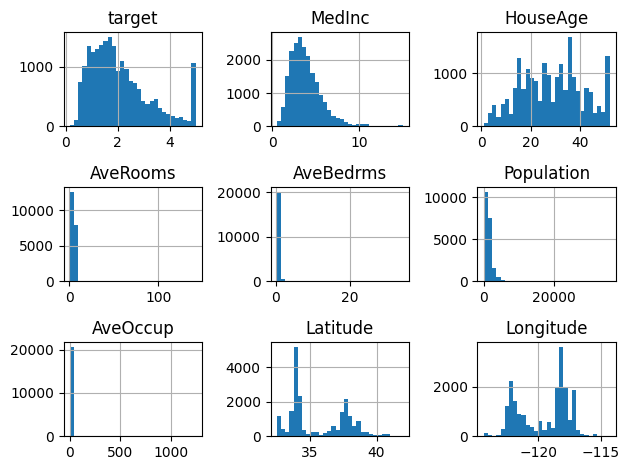

In [8]:
df.hist(bins=30)
plt.tight_layout()

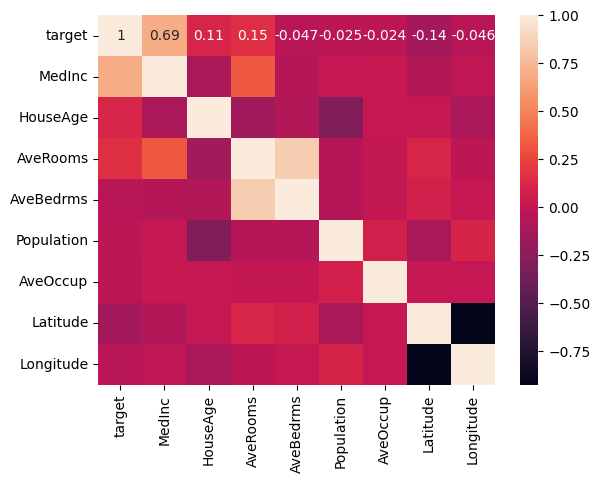

In [9]:
cor = df.corr()
# ヒートマップ
sns.heatmap(cor, annot=True)
plt.show()

In [10]:
#
# データセットを学習用とテスト用に分割
#
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.7,
    test_size=0.3,
    random_state=123
)

In [11]:
#
# モデル構築（重回帰）と精度検証（R2）
#
# インスタンス
model = LinearRegression()
# 学習（学習データ利用）
model.fit(X_train, y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model.score(X_train, y_train))
print('決定係数R2（テストデータ）:', 
      model.score(X_test, y_test))


決定係数R2（学習データ）: 0.6046764934772872
決定係数R2（テストデータ）: 0.6093453526850203


In [12]:
#
# モデル構築（ランダムフォレスト）と精度検証（R2）
#
# インスタンス
model_rf = RandomForestRegressor()
# 学習（学習データ利用）
model_rf.fit(X_train, y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model_rf.score(X_train, y_train))
print('決定係数R2（テストデータ）:', 
      model_rf.score(X_test, y_test))

決定係数R2（学習データ）: 0.9723305303088907
決定係数R2（テストデータ）: 0.812536997785635


通常は、説明変数を減らすと学習データに対する精度は悪化します。適切に特徴量選択（変数選択）されると、それほど悪化することなくモデル構築することができます。

また、適切な特徴量選択（変数選択）はテストデータに対する精度もそれほど悪化させません。悪化どころか、精度向上することすらあります。

# Filter Method

In [13]:
cor = pd.concat([X_train, y_train], axis=1).corr()
# 目的変数との相関係数の絶対値
target_cor = abs(cor['target'])
print(target_cor)

MedInc        0.688627
HouseAge      0.099537
AveRooms      0.148227
AveBedrms     0.044280
Population    0.020798
AveOccup      0.018481
Latitude      0.145068
Longitude     0.043840
target        1.000000
Name: target, dtype: float64


In [15]:
cor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.122568,0.314345,-0.059323,0.009967,0.023615,-0.080874,-0.013373,0.688627
HouseAge,-0.122568,1.000000,-0.145170,-0.072025,-0.303192,0.016059,0.009606,-0.106621,0.099537
AveRooms,0.314345,-0.145170,1.000000,0.860568,-0.070858,-0.004399,0.097190,-0.020410,0.148227
AveBedrms,-0.059323,-0.072025,0.860568,1.000000,-0.064301,-0.005788,0.063246,0.016684,-0.044280
Population,0.009967,-0.303192,-0.070858,-0.064301,1.000000,0.077645,-0.119282,0.111452,-0.020798
AveOccup,0.023615,0.016059,-0.004399,-0.005788,0.077645,1.000000,-0.000204,-0.000055,-0.018481
Latitude,-0.080874,0.009606,0.097190,0.063246,-0.119282,-0.000204,1.000000,-0.924917,-0.145068
Longitude,-0.013373,-0.106621,-0.020410,0.016684,0.111452,-0.000055,-0.924917,1.000000,-0.043840
target,0.688627,0.099537,0.148227,-0.044280,-0.020798,-0.018481,-0.145068,-0.043840,1.000000


In [16]:

# 特徴量選択（変数選択）

# 基準
c = 0.1
# 選択の実施
X_selected = target_cor[target_cor>c]
X_selected = X_selected.drop('target').index
# 選択した特徴量（説明変数）
print(X_selected)

Index(['MedInc', 'AveRooms', 'Latitude'], dtype='object')


In [17]:
print(X_train[X_selected].corr())

            MedInc  AveRooms  Latitude
MedInc    1.000000  0.314345 -0.080874
AveRooms  0.314345  1.000000  0.097190
Latitude -0.080874  0.097190  1.000000


In [18]:
#
# 重回帰
#
# 学習（学習データ利用）
model.fit(X_train[X_selected], y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model.score(X_train[X_selected],y_train))
print('決定係数R2（テストデータ）:', 
      model.score(X_test[X_selected],y_test))

決定係数R2（学習データ）: 0.48594110598767926
決定係数R2（テストデータ）: 0.4848108949227409


In [19]:
#
# ランダムフォレスト
#
# 学習（学習データ利用）
model_rf.fit(X_train[X_selected], y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model_rf.score(X_train[X_selected], y_train))
print('決定係数R2（テストデータ）:', 
      model_rf.score(X_test[X_selected], y_test))

決定係数R2（学習データ）: 0.9449800165815823
決定係数R2（テストデータ）: 0.5854561689672482


# Wrapper Method

In [20]:
#
# 重回帰の学習とその結果（係数のp値の出力）
#
# 切片追加
X_ = sm.add_constant(X)
# 重回帰学習
lr = sm.OLS(y,X_).fit()
# 各係数のp値
lr.pvalues

const          0.000000e+00
MedInc         0.000000e+00
HouseAge       3.505485e-98
AveRooms       1.026311e-73
AveBedrms     6.725726e-115
Population     4.024472e-01
AveOccup       8.303694e-15
Latitude       0.000000e+00
Longitude      0.000000e+00
dtype: float64

In [23]:
# P値　その係数が説明変数に全く影響ない。＞　null 仮説 
# 5% 以下 > 仮説の棄却　＝　影響がある。

In [24]:
#
# 特徴量選択（変数選択）
#
# 関数定義（変数減少法）
## 引数colsは特徴量、引数cは基準
def backward_elimination(cols,c):
    
    while (len(cols)>0):
        
        # p値を格納するハコ
        p = []
        
        # モデル構築（重回帰）
        X_ = sm.add_constant(X_train[cols])
        lr = sm.OLS(y_train,X_).fit()
        
        # p値の抽出
        p = pd.Series(lr.pvalues.values[1:],index = cols)      
        
        # ｐ値が最大の特徴量がc以上の場合に除外
        if(max(p)>c):  
            cols.remove(p.idxmax())
        else:
            break
    return cols
# 特徴量選択（変数選択）の実施
X_selected = backward_elimination(cols=list(X.columns),c=0.05)
print(X_selected)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


In [25]:
#
# 重回帰
#
# 学習（学習データ利用）
model.fit(X_train[X_selected], y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model.score(X_train[X_selected],y_train))
print('決定係数R2（テストデータ）:', 
      model.score(X_test[X_selected],y_test))

決定係数R2（学習データ）: 0.6046674337823822
決定係数R2（テストデータ）: 0.6093221505121822


In [26]:
#
# ランダムフォレスト
#
# 学習（学習データ利用）
model_rf.fit(X_train[X_selected], y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model_rf.score(X_train[X_selected], y_train))
print('決定係数R2（テストデータ）:', 
      model_rf.score(X_test[X_selected], y_test))


決定係数R2（学習データ）: 0.9721800973290201
決定係数R2（テストデータ）: 0.8108672164671115


# RFE法

In [28]:
#
# 特徴量選択（変数選択）
#
# インスタンス
rfe = RFE(LinearRegression())
# 特徴量選定（変数選択）の実施
X_rfe = rfe.fit(X_train,y_train)  
X_selected = X.columns[X_rfe.support_]
# 選択した特徴量
print(X_selected)

Index(['MedInc', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')


In [29]:
#
# 重回帰
#
# 学習（学習データ利用）
model.fit(X_train[X_selected], y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model.score(X_train[X_selected],y_train))
print('決定係数R2（テストデータ）:', 
      model.score(X_test[X_selected],y_test))

決定係数R2（学習データ）: 0.5880850343452328
決定係数R2（テストデータ）: 0.589674927436671


In [31]:
#
# ランダムフォレスト
#
# 学習（学習データ利用）
model_rf.fit(X_train[X_selected], y_train)
# 精度検証（決定係数R2）
print('決定係数R2（学習データ）:', 
      model_rf.score(X_train[X_selected], y_train))
print('決定係数R2（テストデータ）:', 
      model_rf.score(X_test[X_selected], y_test))

決定係数R2（学習データ）: 0.9747203669694233
決定係数R2（テストデータ）: 0.8325994054920429


# Embedded Method

In [32]:
#
# 説明変数の標準化（Lassoで利用）
#
# インスタンス
ss = StandardScaler()
# 学習データの標準化
X_train_std = ss.fit_transform(X_train)
# テストデータの標準化
X_test_std = ss.transform(X_test)

In [33]:
#　ラムダが大きいと厳しい、小さいと寛大になる

In [34]:
# インスタンス ※alphaがラムダに相当
model = Lasso(alpha=0.01)
# 特徴量選定（変数選択）の実施
model.fit(X_train_std,y_train)  
# 選択した特徴量
X_selected = X.columns[model.coef_!=0]
print(X_selected)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')


In [37]:
# インスタンス ※alphaがラムダに相当
model = Lasso(alpha=0.10)
# 特徴量選定（変数選択）の実施
model.fit(X_train_std,y_train)  
# 選択した特徴量
X_selected = X.columns[model.coef_!=0]
print(X_selected)

Index(['MedInc', 'HouseAge', 'Latitude'], dtype='object')


In [38]:
# インスタンス ※alphaがラムダに相当
model = LassoCV()
# 特徴量選定（変数選択）の実施
model.fit(X_train_std,y_train)  
# 選択した特徴量
X_selected = X.columns[model.coef_!=0]
print(X_selected)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')


データをいくつかのグループに分割します。通常、データはランダムに分割されます。
それぞれのグループを使って、異なるalphaの値でLasso回帰モデルを訓練します。
残りのグループを使って、各モデルのパフォーマンスを評価します。一般的な評価指標には、平均二乗誤差（Mean Squared Error）や決定係数（R-squared）などがあります。
すべてのグループにおけるパフォーマンスの平均を計算し、最適なalphaを選択します。一般的には、最小の平均二乗誤差や最大の決定係数を持つalphaが選択されます。